# Working with LLC90 (ECCOv4r4) data on SciServer (using OceanSpy)

<font size="3">This notebook is meant to demonstrate the workflow to use the data on the LLC90 grid (ECCOv4r4) on the Johns Hopkins University's [SciServer](https://www.sciserver.org/) Portal. It serves as a precurser to the LLC4320 tutorial by introducing basic Oceanspy and SciServer essentials to the user and explore the ECCOv4r4 dataset as a test case for data analysis. Here, we will simply try and show model-data comparison between some [WOCE](http://woceatlas.ucsd.edu/) sections in the Atlantic and the ECCOv4r4 data. 
    
Based on a notebook by Ali Siddiqui for Ocean Sciences Meeting, 2022.

&nbsp;&nbsp;&nbsp;&nbsp;<img src="img/oceanspy_logo_blue.png" style="width: 200px;"/>   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp; &nbsp;&nbsp; &nbsp; <img src="img/sciserver.png" style="width: 150px;"/> ; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<img src="img/poseidon_white.png" style="width: 150px;"/> &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;<img src="img/pangeo_logo.png" style="width: 250px;"/> &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;<img src="img/NSF_logo.png" style="width: 150px;"/> 

### Let's get started !

In [1]:
#Importing oceanspy and some other packages

import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt 
import cmocean
import cartopy.crs as ccrs
import numpy as np
import matplotlib.pylab as pylab

In [2]:
# Setting plotting parameters
params = {'figure.figsize':'20,8',
          'legend.fontsize': 'x-large',
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
          'text.usetex':True}
pylab.rcParams.update(params)

In [3]:
# This is to suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Creating a dask client
from dask.distributed import Client
client = Client()
client

2023-01-22 14:46:31,701 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-ll02rje8', purging
2023-01-22 14:46:31,715 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-_m9o_10d', purging
2023-01-22 14:46:31,717 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-ma_2jo0s', purging
2023-01-22 14:46:31,719 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-gd08i6pm', purging


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 4,Total memory: 100.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33393,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 4
Started: Just now,Total memory: 100.00 GiB
Comm: tcp://127.0.0.1:40510,Total threads: 1
Dashboard: http://127.0.0.1:33768/status,Memory: 25.00 GiB
Nanny: tcp://127.0.0.1:46829,


# Loading the LLC90 (ECCOv4r4) dataset

<font size="3">This is where we initiate the oceanspy object and import the ECCOv4r4 data stored on SciServer. The SciServer catalog contains multiple publicly available datasets. A detailed description of the available datasets can be found here: https://oceanspy.readthedocs.io/en/latest/datasets.html and here: https://www.poseidon-ocean.net/products/datasets/. For more information on the ECCO dataset, please refer to ECCO Version 4 Release 4 Synopsis (https://doi.org/10.5281/zenodo.4533349)

In [5]:
%%time
od = ospy.open_oceandataset.from_catalog('ECCO')

Opening ECCO.
ECCO v4r4 3D dataset, ocean simulations on LLC90 grid
CPU times: user 4.01 s, sys: 1.27 s, total: 5.28 s
Wall time: 8.24 s


In [6]:
# Let's see how big the dataset is !
print (str(od.dataset.nbytes * 1.0e-9) + ' GB')

145.518932476 GB


In [7]:
# some bookkeeping
_ds = od._ds.drop({'k', 'k_p1','k_l','k_u'})
od._ds = _ds

# LLC90 as OceanSpy object

<font size="3">This is what the oceanspy object looks like when we import the LLC_90 data in it's native grid, without any transformations into an interpolated lat-lon grid. 

In [8]:
od.dataset

<xarray.Dataset>
Dimensions:     (time: 312, Zl: 50, face: 13, Y: 90, X: 90, Z: 50, Xp1: 90,
                 Yp1: 90, time_midp: 311, Zp1: 51, Zu: 50, nv: 2)
Coordinates: (12/38)
    CS          (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Depth       (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    PHrefC      (Z) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF      (Zp1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    SN          (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XC          (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    ...          ...
    rAw         (face, Y, Xp1) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAz         (face, Yp1, Xp1) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * time        (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
    time_bnds   (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
  * time_midp   (time_midp) datetime64[ns] 1992-01-31T12:00:00 ... 2017-12-01
    timestep    (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables: (12/30)
    ADVr_SLT    (time, Zl, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVr_TH     (time, Zl, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_SLT    (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_TH     (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_SLT    (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH     (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ...          ...
    UVELMASS    (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    VVELMASS    (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    WVELMASS    (time, Zl, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    oceFWflx    (time, face, Y, X) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceQsw      (time, face, Y, X) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceSPtnd    (time, Z, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/16)
    date_created:               Mon Dec 30 11:13:26 2019
    geospatial_lat_max:         90.0
    geospatial_lat_min:         -90.0
    geospatial_lon_max:         180.0
    geospatial_lon_min:         -179.9991912841797
    geospatial_vertical_max:    -5.0
    ...                         ...
    title:                      ECCOv4 MITgcm grid information
    OceanSpy_parameters:        {'rSphere': 6371.0, 'eq_state': 'jmd95', 'rho...
    OceanSpy_name:              ECCO_v4r4
    OceanSpy_description:       ECCO v4r4 3D dataset, ocean simulations on LL...
    OceanSpy_grid_coords:       {'Y': {'Y': None, 'Yp1': -0.5}, 'X': {'X': No...
    OceanSpy_face_connections:  {'face': {0: {'X': ((12, 'Y', False), (3, 'X'...

# Using the `ospy.cutout` function to transform the data. 

<font size="3">Since the dataset is in its native LLC grid distributed across 13 tiles/faces, we need to transform the data into a regular lat-lon grid to be able to use it with OceanSpy. For now, the `ospy.cutout` function helps us achieve that. Note that the ECCO data is also available as interpolated monthly fields on regular lat-lon grids, however, we take the example of the LLC_90 to demonstrate this transformation because as we move towards higher resolution datasets, such as the LLC2160 and LLC4320, we will have to transform it from the native grid, since those are not available as interpolated datasets. 

In [9]:
%%time
## Parameters

varList = ['THETA', 'SALT', 'Depth']
YRange = [20,80] # degrees latitude
XRange = [-90, 20] # longitude
add_Hbdr = False
mask_outside = True
ZRange = None
add_Vbdr = False
timeRange = ['1992', '2017']
timeFreq= None
sampMethod = 'snapshot'
dropAxes = False

# Transformation parameters
centered= 'Atlantic'
transformation = 'arctic_crown'

## Carrying out the cutout
cut_od = ospy.subsample.cutout(od,varList,YRange,XRange,add_Hbdr,mask_outside,
                               ZRange,add_Vbdr,timeRange,timeFreq,sampMethod,dropAxes)

Cutting out the oceandataset.
faces in the cutout [2, 6, 10]
CPU times: user 1min 43s, sys: 11.8 s, total: 1min 55s
Wall time: 3min 6s


In [10]:
# Let's see how big the cutout is
print (str(cut_od.dataset.nbytes * 1.0e-9) + ' GB')

1.4078207520000001 GB


In [11]:
# How does is look ?
cut_od._ds

<xarray.Dataset>
Dimensions:    (Z: 50, time: 300, Zp1: 51, Zl: 50, Zu: 50, time_midp: 299,
                X: 110, Xp1: 111, Y: 105, Yp1: 106, nv: 2)
Coordinates: (12/18)
  * Z          (Z) float32 -5.0 -15.0 -25.0 ... -5.039e+03 -5.461e+03 -5.906e+03
  * time       (time) datetime64[ns] 1992-01-16T12:00:00 ... 2016-12-16T12:00:00
  * Zp1        (Zp1) float32 0.0 -10.0 -20.0 ... -5.678e+03 -6.134e+03
  * Zl         (Zl) float32 0.0 -10.0 -20.0 ... -4.834e+03 -5.244e+03 -5.678e+03
  * Zu         (Zu) float32 -10.0 -20.0 -30.0 ... -5.678e+03 -6.134e+03
  * time_midp  (time_midp) datetime64[ns] 1992-01-31T12:00:00 ... 2016-12-01T...
    ...         ...
    YC         (Y, X) float32 dask.array<chunksize=(105, 110), meta=np.ndarray>
    YG         (Yp1, Xp1) float32 dask.array<chunksize=(106, 111), meta=np.ndarray>
    YU         (Y, Xp1) float32 dask.array<chunksize=(105, 111), meta=np.ndarray>
    XU         (Y, Xp1) float32 dask.array<chunksize=(105, 111), meta=np.ndarray>
    YV         (Yp1, X) float32 dask.array<chunksize=(106, 110), meta=np.ndarray>
    XV         (Yp1, X) float32 dask.array<chunksize=(106, 110), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables: (12/25)
    THETA      (time, Z, Y, X) float32 dask.array<chunksize=(1, 50, 105, 110), meta=np.ndarray>
    SALT       (time, Z, Y, X) float32 dask.array<chunksize=(1, 50, 105, 110), meta=np.ndarray>
    Depth      (Y, X) float32 dask.array<chunksize=(105, 110), meta=np.ndarray>
    CS         (Y, X) float32 dask.array<chunksize=(105, 110), meta=np.ndarray>
    PHrefC     (Z) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF     (Zp1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    ...         ...
    rA         (Y, X) float32 dask.array<chunksize=(105, 110), meta=np.ndarray>
    rAs        (Yp1, X) float32 dask.array<chunksize=(106, 110), meta=np.ndarray>
    rAw        (Y, Xp1) float32 dask.array<chunksize=(105, 111), meta=np.ndarray>
    rAz        (Yp1, Xp1) float32 dask.array<chunksize=(106, 111), meta=np.ndarray>
    time_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    timestep   (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    OceanSpy_face_connections:  None
    OceanSpy_grid_coords:       {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': Non...
    OceanSpy_description:       Cutout of
    OceanSpy_grid_periodic:     []

# Observational data (WOCE sections)

<font size="3">As a test case, we will simply take the A01 section in the North Atlantic and plot the salinity and potential temperature vertical sections. We will then use this to validate the model data. This section needs expansion with information about the campaigns and how to fetch data.<br>

![WOCE Atlantic section](img/woce_stations_final.jpg "WOCE image")

In [12]:
# opening files from CCHDO https://cchdo.ucsd.edu/
ds_a1 = xr.open_dataset('test_data/06MT30_3_ctd.nc')
ds_a5 = xr.open_dataset('test_data/29HE06_1_ctd.nc')

# Creating the A01 section for ECCO using OceanSpy

In [13]:
# Masking the depth
cut_od._ds['Depth_masked'] = cut_od._ds['Depth']
depth_masked = cut_od._ds['Depth_masked']
depth_masked = depth_masked.where(depth_masked>0)
cut_od._ds['Depth_masked'] = depth_masked

# Making a survey using OceanSpy !

<font size="3">We simply provide the lat-lon information to the `ospy.subsample.survey_stations` function along with any other relavant information required, such as depth levels and the variables that need to be included in the analysis. 

In [14]:
time_range_A01 = ['1994-11', '1994-12']
time_range_A05 = ['1992-07', '1992-08']

In [15]:
%%time
## ecco A01 and A05 information 

lat_a1 = ds_a1.latitude
lon_a1 = ds_a1.longitude
depth_a1 = [-ds_a1.btm_depth.min(), -ds_a1.btm_depth.max()]


lat_a5 = ds_a5.latitude
lon_a5 = ds_a5.longitude
depth_a5 = [ds_a5.btm_depth.min(), -ds_a5.btm_depth.max()]

# Extract ship survey and fields used by this notebook
od_surv_a1 = cut_od.subsample.survey_stations(Xsurv=lon_a1,
                                              Ysurv=lat_a1,
                                              ZRange=depth_a1,
                                              timeRange = time_range_A01,
                                              varList=["THETA", 'SALT'])

od_surv_a5 = cut_od.subsample.survey_stations(Xsurv=lon_a5,
                                              Ysurv=lat_a5,
                                              ZRange=depth_a5,
                                              timeRange = time_range_A05,
                                              varList=["THETA", 'SALT'])

Cutting out the oceandataset.
Carrying out survey.
Variables to interpolate: ['THETA', 'SALT', 'XC', 'XG', 'YC', 'YG', 'YU', 'XU', 'YV', 'XV'].
Interpolating [THETA].
Interpolating [SALT].
Interpolating [XC].
Interpolating [XG].
Interpolating [YC].
Interpolating [YG].
Interpolating [YU].
Interpolating [XU].
Interpolating [YV].
Interpolating [XV].
Cutting out the oceandataset.
Carrying out survey.
Variables to interpolate: ['THETA', 'SALT', 'XC', 'XG', 'YC', 'YG', 'YU', 'XU', 'YV', 'XV'].
Interpolating [THETA].
Interpolating [SALT].
Interpolating [XC].
Interpolating [XG].
Interpolating [YC].
Interpolating [YG].
Interpolating [YU].
Interpolating [XU].
Interpolating [YV].
Interpolating [XV].
CPU times: user 21 s, sys: 2.23 s, total: 23.2 s
Wall time: 24.6 s


# Visualizing the sections

<font size="3">We can now visualize the section A01 and compare the observations with the model data !

In [16]:
# Here we can set projections for the visuals
cut_od = cut_od.set_projection('Orthographic', central_longitude=-40)

CPU times: user 15.5 s, sys: 2.31 s, total: 17.8 s
Wall time: 21.2 s


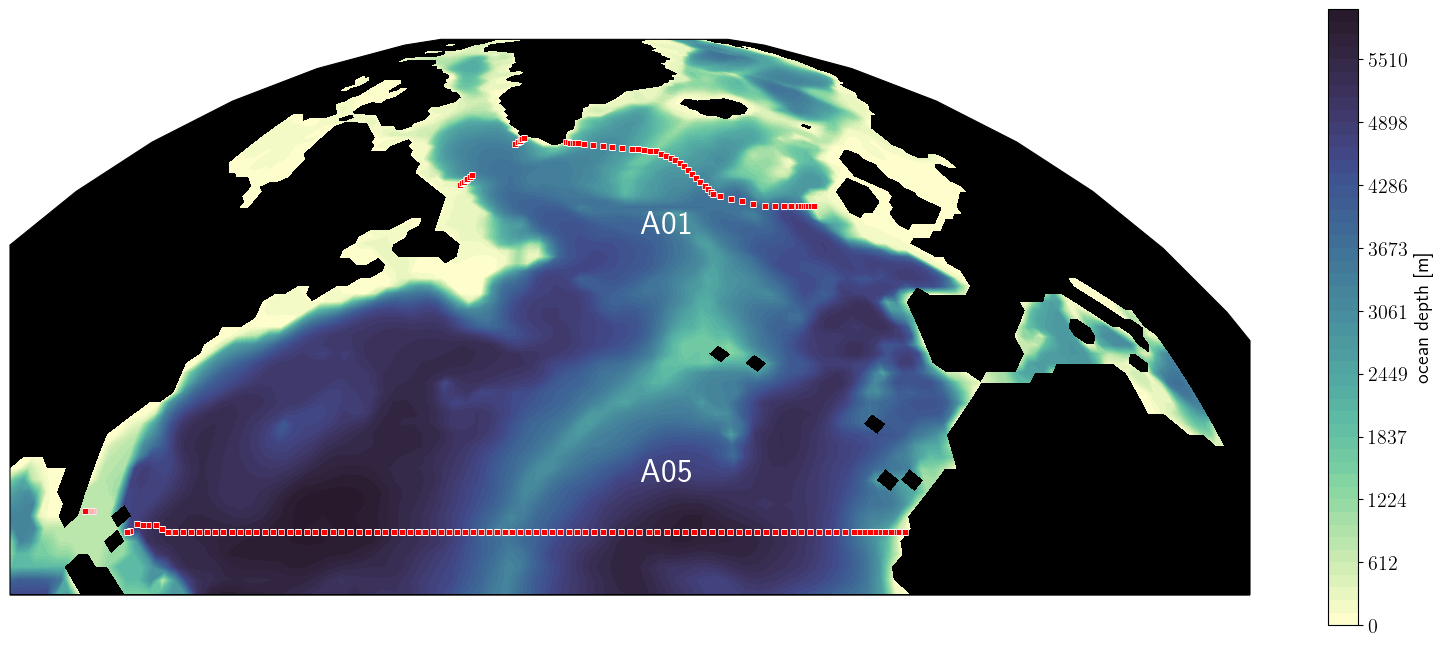

In [17]:
%%time
# Plot map of survey locations

fig= plt.figure(frameon=True)
ax = cut_od.plot.horizontal_section(varName="Depth_masked", 
                                    plotType='contourf',
                                    levels=np.linspace(0,6000,50),
                                    cmap = cmocean.cm.deep,
                                    use_coords=True)

XC_a1 = od_surv_a1.dataset["XC"].squeeze()
YC_a1 = od_surv_a1.dataset["YC"].squeeze()

XC_a5 = od_surv_a5.dataset["XC"].squeeze()
YC_a5 = od_surv_a5.dataset["YC"].squeeze()

ax.set_extent([-85, 15, 20, 80], crs=ccrs.PlateCarree())

a1_line = ax.plot(XC_a1, YC_a1, 's', markersize=5, markerfacecolor='r',
             markeredgewidth=0.5, markeredgecolor='w', transform=ccrs.PlateCarree())
a5_line = ax.plot(XC_a5, YC_a5, 's', markersize=5, markerfacecolor='r',
             markeredgewidth=0.5, markeredgecolor='w', transform=ccrs.PlateCarree())

plt.figtext(0.44,0.60, 'A01', fontsize=24, color='white')
plt.figtext(0.44,0.29, 'A05', fontsize=24, color='white')

ax.patch.set_facecolor('black')

# Visualizing the vertical sections

<font size="3">A01 section in ECCO and observations 

In [18]:
od_surv_a1._ds = od_surv_a1._ds.where(od_surv_a1._ds.SALT>34)
od_surv_a5._ds = od_surv_a5._ds.where(od_surv_a5._ds.SALT>34)

## Salinity

Computing weighted_mean.


/home/idies/mambaforge/envs/Oceanography/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


CPU times: user 2.9 s, sys: 484 ms, total: 3.38 s
Wall time: 5.96 s


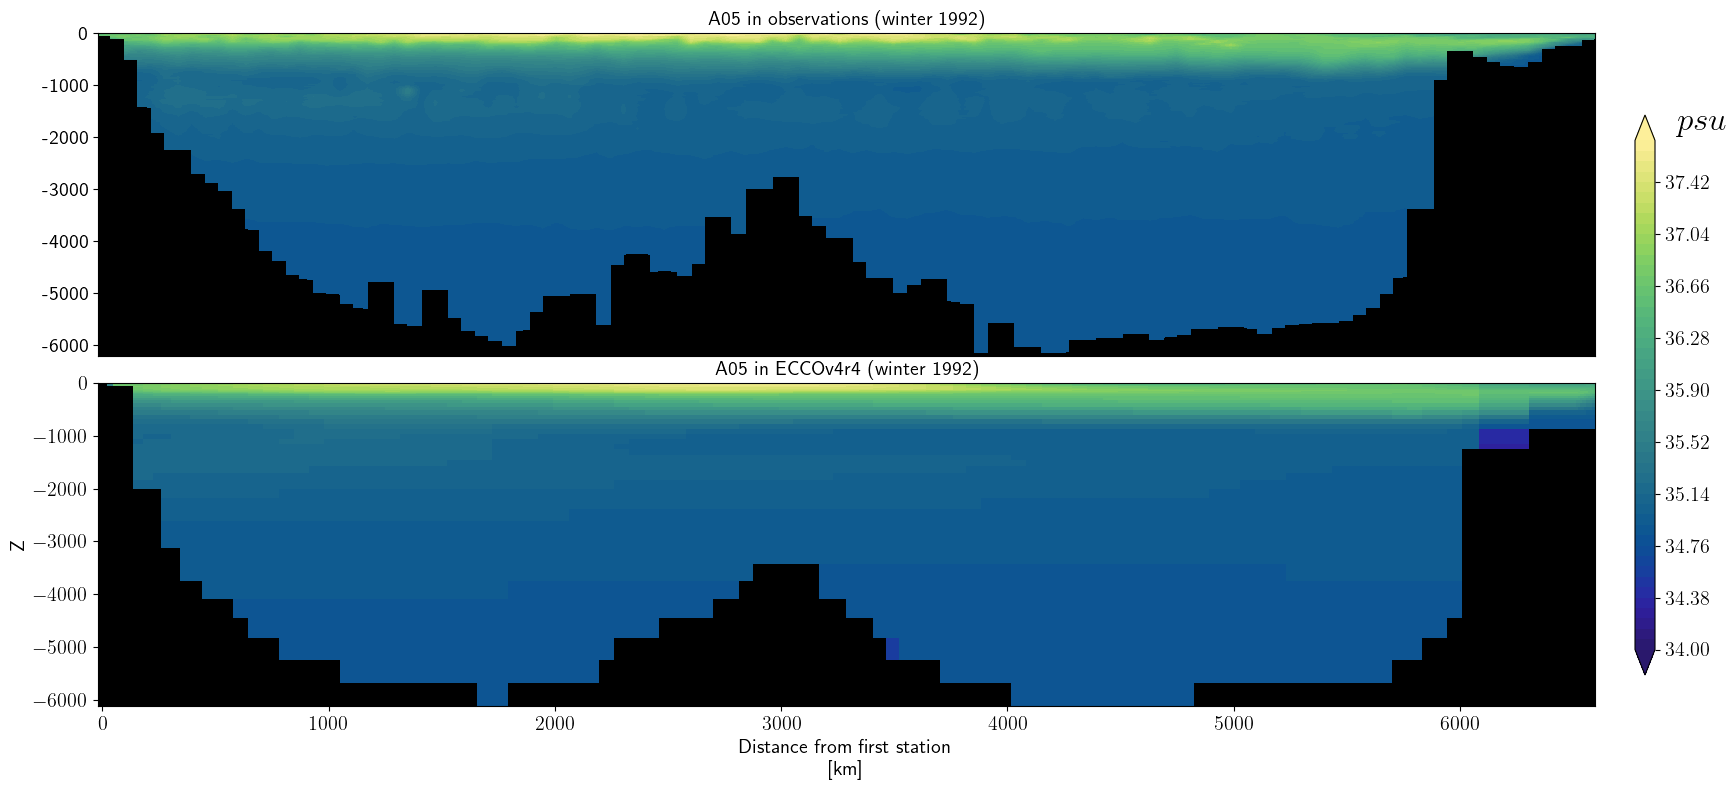

In [19]:
%%time
import numpy as np
from cartopy.crs import PlateCarree
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# To toggle between the A1 and A5 sections, simply uncomment the commented lines and make sure you comment out the lines for the current case.

# Create subplots
fig = plt.figure()
ax1 = plt.subplot2grid((2,1), (0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((2,1), (1,0), rowspan=1, colspan=1)

levels_salt_a5 = np.linspace(34,ds_a5.ctd_salinity.max(),50)
levels_salt_a1 = np.linspace(34,ds_a1.ctd_salinity.max(),50)

c0=ax1.contourf(ds_a5.ctd_salinity.transpose(), levels_salt_a5, cmap=cmocean.cm.haline, extend='both' )
#c0=ax1.contourf(ds_a1.ctd_salinity.transpose(), levels_salt_a1, cmap=cmocean.cm.haline, extend='both' )

ax1.invert_yaxis()

ax1.set_xticks([])
ax1.set_yticklabels(['0','-1000','-2000', '-3000', '-4000', '-5000', '-6000'])
#ax1.set_yticklabels(['0','-1000','-2000', '-3000', '-4000'])
ax1.set_facecolor('black')
#ax1.set_title('A01 in observations (winter 1994)')
ax1.set_title('A05 in observations (winter 1992)')


ax2 = od_surv_a5.plot.vertical_section(
    varName="SALT",
    robust=True,
    subsamp_kwargs={'time':time_range_A05[0]},
    levels=levels_salt_a5,
    meanAxes='time',
    cmap=cmocean.cm.haline,
    add_colorbar=False,
    ax=ax2)
    
ax2.patch.set_facecolor('black')
#ax2.set_title('A01 in ECCOv4r4 (winter 1994)')
ax2.set_title('A05 in ECCOv4r4 (winter 1992)')

plt.figtext(0.84,0.83, '$psu$', fontsize=24)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.7])
fig.colorbar(c0, cax=cbar_ax)

## Temperature

Computing weighted_mean.
CPU times: user 1.93 s, sys: 333 ms, total: 2.26 s
Wall time: 4.38 s


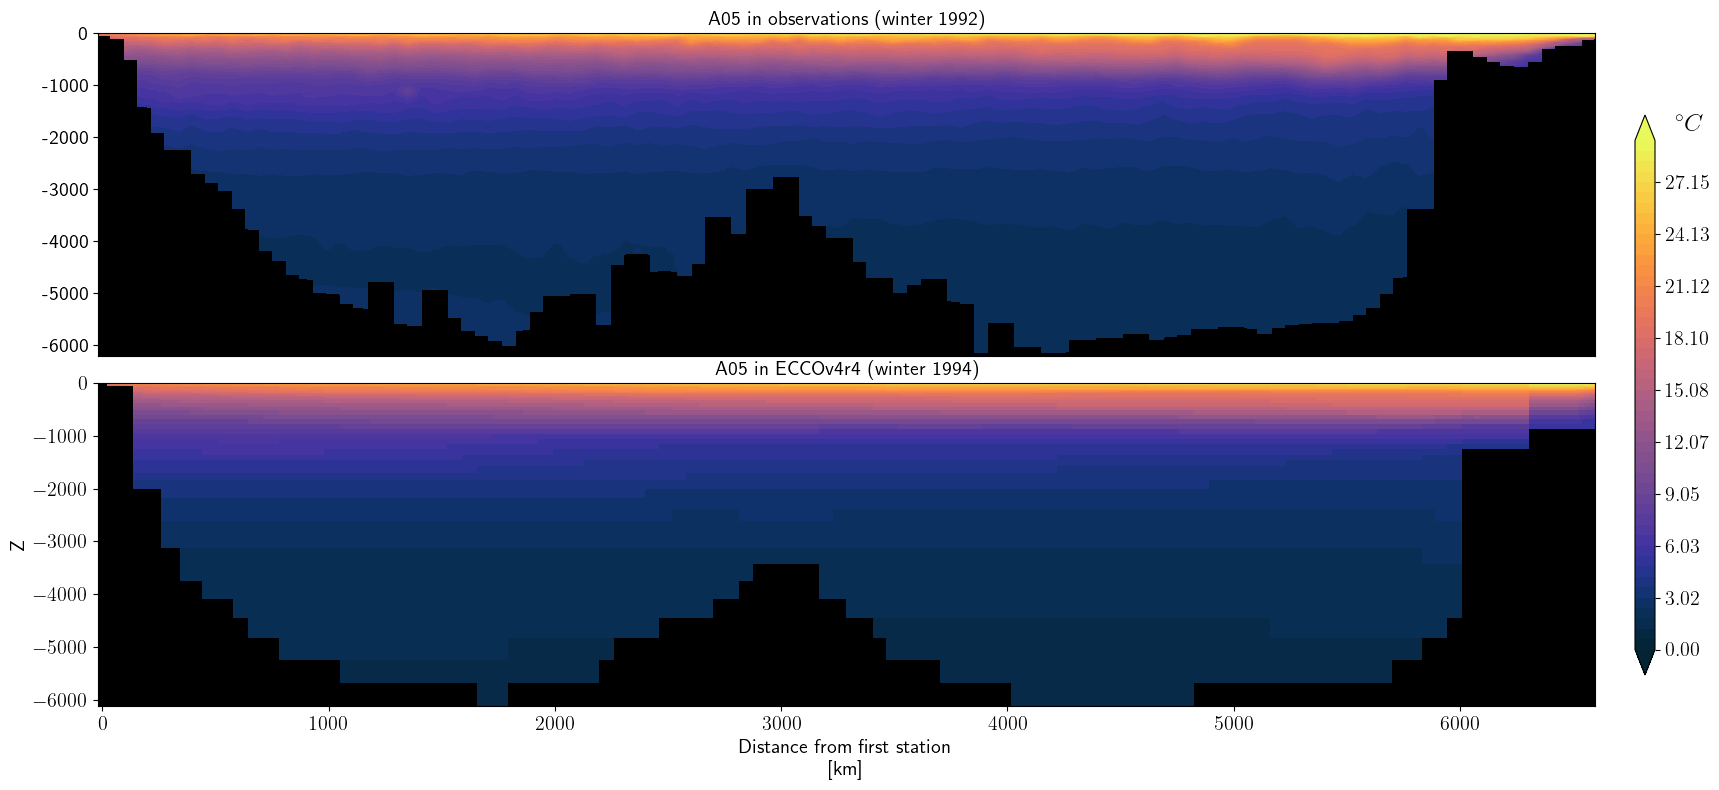

In [20]:
%%time
# To toggle between the A1 and A5 sections, simply uncomment the commented lines and make sure you comment out the lines for the current case.

fig = plt.figure()
ax1 = plt.subplot2grid((2,1), (0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((2,1), (1,0), rowspan=1, colspan=1)

levels_temp_a5 = np.linspace(0,ds_a5.ctd_temperature.max(),50)
#levels_temp_a1 = np.linspace(0,ds_a5.ctd_temperature.max(),50)

c0=ax1.contourf(ds_a5.ctd_temperature.transpose(), levels_temp_a5, cmap=cmocean.cm.thermal, extend='both' )
#c0=ax1.contourf(ds_a1.ctd_temperature_unk.transpose(), levels_temp_a1, cmap=cmocean.cm.thermal, extend='both' )

ax1.invert_yaxis()

ax1.set_xticks([])
ax1.set_yticklabels(['0','-1000','-2000', '-3000', '-4000', '-5000', '-6000'])
#ax1.set_yticklabels(['0','-1000','-2000', '-3000', '-4000'])
ax1.set_facecolor('black')
#ax1.set_title('A01 in observations (winter 1994)')
ax1.set_title('A05 in observations (winter 1992)')


# Change the dataset when toggling between A1 and A5
ax2 = od_surv_a5.plot.vertical_section(
    varName="THETA",
    robust=True,
    subsamp_kwargs={'time':time_range_A05[0]},
    levels=levels_temp_a5,
    meanAxes='time',
    cmap=cmocean.cm.thermal,
    add_colorbar=False,
    ax=ax2)
    
ax2.patch.set_facecolor('black')
#ax2.set_title('A01 in ECCOv4r4 (winter 1994)')
ax2.set_title('A05 in ECCOv4r4 (winter 1994)')


plt.figtext(0.84,0.83, '$^{\circ}C$', fontsize=18)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.01, 0.7])
fig.colorbar(c0, cax=cbar_ax)